<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [8]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [9]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [10]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [11]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Seuil de signification (alpha) utilisé : 0.05
--------------------------------------------------

--- Tâche 1: Familiarisation avec les données ---

Premières 5 lignes du jeu de données:
   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV    AGE_group  
0  296.0     15.3   4.98  24.0     35 to 70  
1  242.0     17.8   9.14  21.6  70 and more  
2  242.0     17.8   4.03  34.7     35 to 70  
3  222.0     18.7   2.94  33.4     35 to 70  
4  222.0     18.7   5.33  36.2     35 to 70  

Informations sur les colonnes et les types de données:
<class 'pand

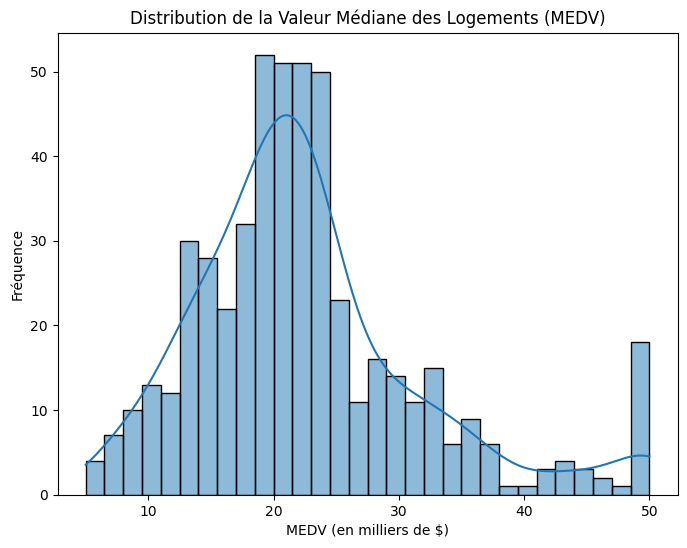

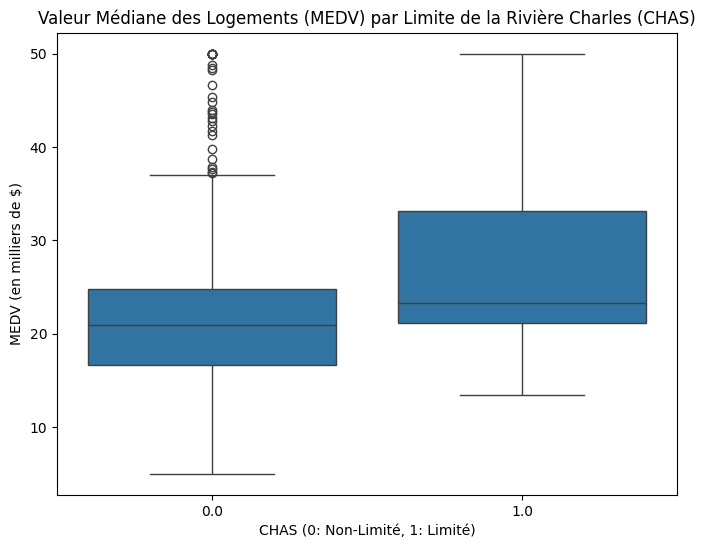

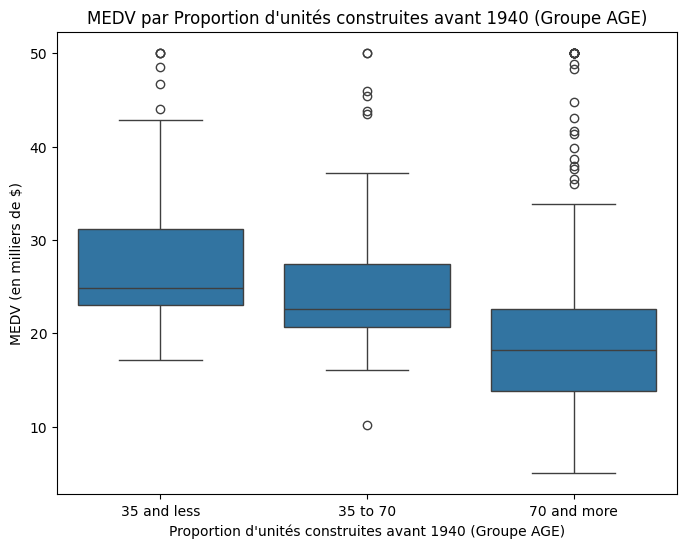

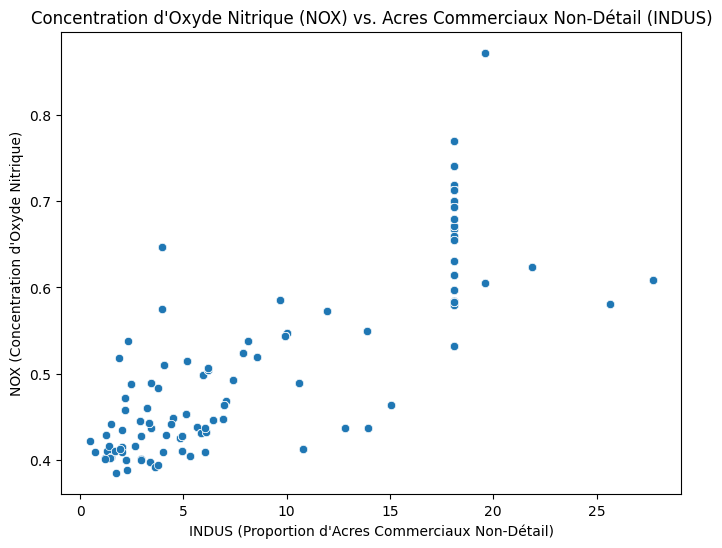

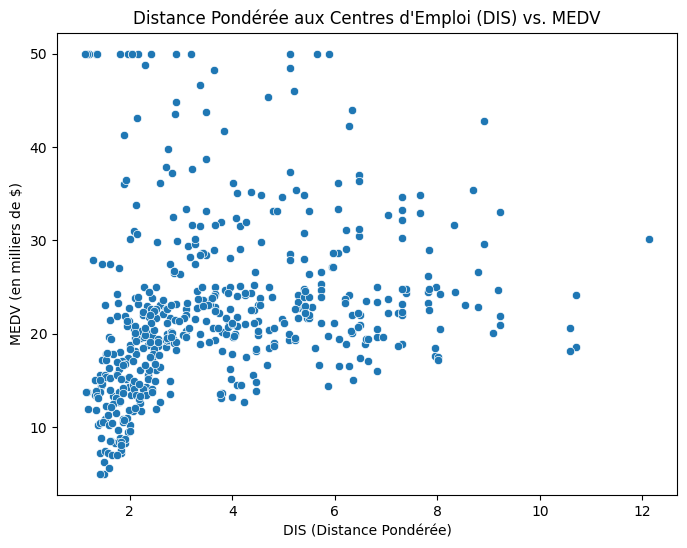

H0: There is no significant difference in the mean of MEDV (μ_river = μ_noriver).
Ha: There is a significant difference in the mean of MEDV (μ_river ≠ μ_noriver).
Test de Levene (p-value): 0.0326. Variances égales assumées: False
Statistique T: 3.1133, Valeur P: 0.0036
Conclusion: Reject H0. -> There is a significant difference in the median of houses .
--------------------------------------------------
H0: The MEDV means are equal for all age groups (μ1 = μ2 = μ3).
Ha: At least one MEDV average is different.
Statistique F: 36.4076, Valeur P: 0.0000
Conclusion: Reject H0. -> There is a statistically significant difference between the median home values of at least two age groups.
--------------------------------------------------
H0: There is no linear relationship between NOX and INDUS (ρ = 0).
Ha: There is a linear relationship between NOX and INDUS (ρ ≠ 0).
Coefficient de Corrélation de Pearson (r): 0.7637, Valeur P: 0.0000
Conclusion: RejECT H0. -> IThere is a statistically signifi

In [13]:
ALPHA = 0.05
print(f"Seuil de signification (alpha) utilisé : {ALPHA}")
print("-" * 50)

print("\n--- Tâche 1: Familiarisation avec les données ---")
print("\nPremières 5 lignes du jeu de données:")
print(boston_df.head())
print("\nInformations sur les colonnes et les types de données:")
boston_df.info()


key_vars = ['MEDV', 'CRIM', 'AGE', 'NOX', 'INDUS', 'DIS', 'CHAS']
print("\nStatistiques descriptives pour les variables clés:")
print(boston_df[key_vars].describe())


pyplot.figure(figsize=(8, 6))
sns.histplot(boston_df['MEDV'], bins=30, kde=True)
pyplot.title('Distribution de la Valeur Médiane des Logements (MEDV)')
pyplot.xlabel('MEDV (en milliers de $)')
pyplot.ylabel('Fréquence')
pyplot.show()

pyplot.figure(figsize=(8, 6))
sns.boxplot(x='CHAS', y='MEDV', data=boston_df)
pyplot.title('Valeur Médiane des Logements (MEDV) par Limite de la Rivière Charles (CHAS)')
pyplot.xlabel('CHAS (0: Non-Limité, 1: Limité)')
pyplot.ylabel('MEDV (en milliers de $)')
pyplot.show()

boston_df['AGE_group'] = pd.cut(boston_df['AGE'], 
                                bins=[-np.inf, 35, 70, np.inf], 
                                labels=['35 and less', '35 to 70', '70 and more'],
                                right=False)

pyplot.figure(figsize=(8, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df,
            order=['35 and less', '35 to 70', '70 and more'])
pyplot.title('MEDV par Proportion d\'unités construites avant 1940 (Groupe AGE)')
pyplot.xlabel('Proportion d\'unités construites avant 1940 (Groupe AGE)')
pyplot.ylabel('MEDV (en milliers de $)')
pyplot.show()


pyplot.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title('Concentration d\'Oxyde Nitrique (NOX) vs. Acres Commerciaux Non-Détail (INDUS)')
pyplot.xlabel('INDUS (Proportion d\'Acres Commerciaux Non-Détail)')
pyplot.ylabel('NOX (Concentration d\'Oxyde Nitrique)')
pyplot.show()


pyplot.figure(figsize=(8, 6))
sns.scatterplot(x='DIS', y='MEDV', data=boston_df)
pyplot.title('Distance Pondérée aux Centres d\'Emploi (DIS) vs. MEDV')
pyplot.xlabel('DIS (Distance Pondérée)')
pyplot.ylabel('MEDV (en milliers de $)')
pyplot.show()




print("H0: There is no significant difference in the mean of MEDV (μ_river = μ_noriver).")
print("Ha: There is a significant difference in the mean of MEDV (μ_river ≠ μ_noriver).")

river = boston_df[boston_df['CHAS'] == 1]['MEDV']
no_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

levene_test = scipy.stats.levene(river, no_river)
equal_var = levene_test.pvalue > ALPHA
print(f"Test de Levene (p-value): {levene_test.pvalue:.4f}. Variances égales assumées: {equal_var}")

t_stat, p_value_ttest = scipy.stats.ttest_ind(river, no_river, equal_var=equal_var)
print(f"Statistique T: {t_stat:.4f}, Valeur P: {p_value_ttest:.4f}")


if p_value_ttest < ALPHA:
    conclusion = "Reject H0."
    insight = "There is a significant difference in the median of houses ."
else:
    conclusion = "Ne pas rejeter H0."
    insight = "There is no a significant difference in the median of houses"
print(f"Conclusion: {conclusion} -> {insight}")
print("-" * 50)


print("H0: The MEDV means are equal for all age groups (μ1 = μ2 = μ3).")
print("Ha: At least one MEDV average is different.")

age_low = boston_df[boston_df['AGE_group'] == '35 and less']['MEDV']
age_mid = boston_df[boston_df['AGE_group'] == '35 to 70']['MEDV']
age_high = boston_df[boston_df['AGE_group'] == '70 and more']['MEDV']

# Exécution de l'ANOVA
f_stat_anova, p_value_anova = scipy.stats.f_oneway(age_low, age_mid, age_high)
print(f"Statistique F: {f_stat_anova:.4f}, Valeur P: {p_value_anova:.4f}")

# Conclusion
if p_value_anova < ALPHA:
    conclusion = "Reject H0."
    insight = "There is a statistically significant difference between the median home values of at least two age groups."
else:
    conclusion = "DON'T REJECT H0."
    insight = "There is no statistically significant difference between median house values."
print(f"Conclusion: {conclusion} -> {insight}")
print("-" * 50)


print("H0: There is no linear relationship between NOX and INDUS (ρ = 0).")
print("Ha: There is a linear relationship between NOX and INDUS (ρ ≠ 0).")

pearson_r, p_value_corr = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Coefficient de Corrélation de Pearson (r): {pearson_r:.4f}, Valeur P: {p_value_corr:.4f}")

if p_value_corr < ALPHA:
    conclusion = "RejECT H0."
    insight = f"IThere is a statistically significant and strong linear relationship (r={pearson_r:.2f}, positive) between nitric oxide concentration and the proportion of commercial acres."
else:
    conclusion = "Dont reject H0."
    insight = "There is no statistically significant linear relationship."
print(f"Conclusion: {conclusion} -> {insight}")
print("-" * 50)


print("H0: The weighted distance (DIS) has no linear impact on MEDV (β1 = 0).")
print("Ha: The weighted distance (DIS) has a linear impact on MEDV (β1 ≠ 0).")

X = boston_df['DIS']
Y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(Y, X).fit()
print(model.summary())

coef_dis = model.params['DIS']
p_value_dis = model.pvalues['DIS']
r_squared = model.rsquared

# Conclusion
if p_value_dis < ALPHA:
    conclusion = "Reject H0."
    insight = f"DIS has a statistically significant impact on MEDV. The regression coefficient(β1={coef_dis:.4f}) indicates that a one unit increase in DIS is associated with an increase in MEDV of${coef_dis * 1000:.2f}."
else:
    conclusion = "Dont reject H0."
    insight = "DIS has no statistically significant impact on MEDV."
print(f"Conclusion: {conclusion} -> {insight}")
print(f"The model explain {r_squared*100:.2f}% of the varience of MEDV.")